In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

# Convolutions

In [ ]:
# create a conv2d class instance with parameters

# parameters
inChans  = 3 # RGB
outChans = 15
krnSize  = 5 # should be an odd number
stride   = 1
padding  = 0

# create the instance (cf nn.Linear)
c = nn.Conv2d(inChans,outChans,krnSize,stride,padding)

# let's have a look at it
print(c)
print(' ')

# check out its weight tensor; what are the dimensions?
print( 'Size of weights: ' + str(c.weight.shape) )
print( 'Size of bias: ' + str(c.bias.shape) )

In [ ]:
conv = nn.Conv2d(3,15,3,1,1)

In [ ]:
conv.weight.shape

In [ ]:
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))

# Applying a Filter

In [ ]:
import urllib.request
from PIL import Image

  
urllib.request.urlretrieve(
  'https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Boat_in_the_beach_Chacachacare.jpg/640px-Boat_in_the_beach_Chacachacare.jpg',
   "boat.png")
  
img = Image.open("boat.png")

In [ ]:
img.show()

In [ ]:
from PIL import Image
import torchvision.transforms.functional as TF

x = TF.to_tensor(img)
x.unsqueeze_(0)
print(x.shape)

In [ ]:
conv = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1, bias=False)
conv.weight = torch.nn.Parameter(torch.ones((1,1,3, 3))/9.0)

In [ ]:
# imgfilter = torch.zeros((1,3,3, 3))
# imgfilter[0,:,1,:]=1
# imgfilter = torch.nn.Parameter(imgfilter)

In [ ]:
# [[0,-1,0],[-1,5,-1],[0,-1,0]]

In [ ]:
imgfilter = torch.zeros((1,3,3, 3))
imgfilter[0,:]=torch.tensor([[-10,10,-10],[10,100,10],[-10,10,-10]])
imgfilter = torch.nn.Parameter(imgfilter)

# blur_filter = torch.nn.Parameter(torch.ones((1,3,3, 3))*15)

import torch.nn.functional as F

z = F.conv2d(x, imgfilter, padding=1, stride=1)
z = z.detach().numpy()[0][0]

output = Image.fromarray(z)
output.show()

In [ ]:
z.shape[0]

In [ ]:

# from matplotlib import pyplot as plt
# plt.imshow(z, interpolation='nearest')
# plt.show()

In [ ]:
img2 = F.conv2d(x, imgfilter, padding=1)
img2.size()

In [ ]:
img2 = F.conv2d(x, imgfilter, padding=1)
img_post = img2.detach().numpy()[0]
img_post.shape

In [ ]:
Image.fromarray(img_post[0], 'L').show()

# Digits Classification

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.MNIST('train', download=True, train=True, transform=transform)
testset = datasets.MNIST('test', download=True, train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [ ]:
kernel.size()

In [ ]:
matrix.unsqueeze(0)

In [ ]:
F.conv2d(matrix, kernel.unsqueeze(0), stride=[1])

# Fashion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

In [2]:
all_transforms = transforms.Compose([
        transforms.ToTensor()
    ])
train_data = torchvision.datasets.FashionMNIST('fashion_data', train=True, download=True, transform=all_transforms)
test_data = torchvision.datasets.FashionMNIST('fashion_data', train=False,  transform=all_transforms)

C:\Users\Joshi008\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [68]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

In [8]:
label.item()

5

In [36]:
def mnist_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat", 
                 5: "Sandal", 
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    label = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[label]

In [21]:
samples,labels = next(iter(train_loader))
samples.size()

torch.Size([64, 1, 28, 28])

In [23]:
labels.size()

torch.Size([64])

In [17]:
a[1].size()

torch.Size([100])

In [10]:
len(train_data)

60000

Dress


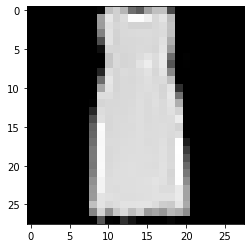

In [34]:
plt.imshow(samples[2].squeeze(), cmap="gray")
print (output_label(labels[2].item()))

9


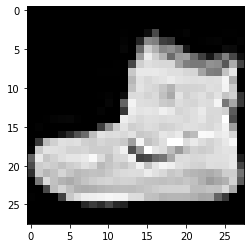

In [6]:
image, label = next(iter(train_data))
plt.imshow(image.squeeze(), cmap="gray")
print(label)

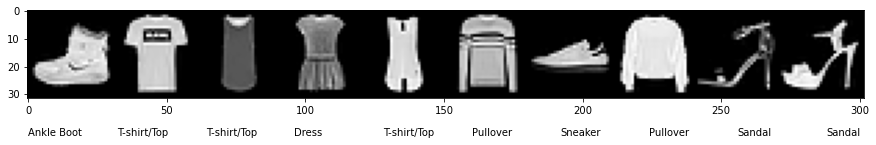

In [52]:
demo_loader = torch.utils.data.DataLoader(train_data, batch_size=10)

batch = next(iter(demo_loader))
images, labels = batch

grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))

for i, label in enumerate(labels):
    plt.text(32*i, 45, mnist_label(label))



In [85]:
class FashionCNN1(nn.Module):
    
    def __init__(self):
        super(FashionCNN, self).__init__()
        
        self.convlayer = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4)
        )
        
        self.fully_connected_layer_1 = nn.Linear(in_features=32*7*7, out_features=64)
        self.drop = nn.Dropout2d(0.25)
        self.fully_connected_layer_2 = nn.Linear(in_features=64, out_features=64)
        self.fully_connected_layer_3 = nn.Linear(in_features=64, out_features=10)
        
    def forward(self, x):
        out = self.convlayer(x)
        out = out.view(out.size(0), -1)
        out = self.fully_connected_layer_1(out)
        out = self.drop(out)
        out = self.fully_connected_layer_2(out)
        out = self.fully_connected_layer_3(out)
        
        return out
    
model = FashionCNN()
print(model)

FashionCNN(
  (convlayer): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (fully_connected_layer_1): Linear(in_features=1568, out_features=64, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fully_connected_layer_2): Linear(in_features=64, out_features=64, bias=True)
  (fully_connected_layer_3): Linear(in_features=64, out_features=10, bias=True)
)


In [86]:
error = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)


In [87]:
num_epochs = 10
num_batches = 0
batch_size = 100

lstlosses = []
lstiterations = []
lstaccuracy = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    print ("Epoch: {} of {}".format(epoch+1, num_epochs))
    for images, labels in train_loader:
        train = Variable(images)
        labels = Variable(labels)
        
        outputs = model(train)
        loss = error(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        num_batches += 1
    
        if num_batches % batch_size==0:  
            total = 0
            matches = 0
        
            for images, labels in test_loader:
                labels_list.append(labels)
                test = Variable(images)
                outputs = model(test)
            
                predictions = torch.max(outputs, 1)[1]
                predictions_list.append(predictions)
                matches += (predictions == labels).sum()
                total += len(labels)
            
            accuracy = matches * 100 / total
            lstlosses.append(loss.data)
            lstiterations.append(num_batches)
            lstaccuracy.append(accuracy)
        
        if not (num_batches % batch_size):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(num_batches, loss.data, accuracy))

Epoch: 1 of 10
Iteration: 50, Loss: 0.6086341142654419, Accuracy: 76.94999694824219%
Iteration: 100, Loss: 0.5399684906005859, Accuracy: 79.62000274658203%
Iteration: 150, Loss: 0.46176013350486755, Accuracy: 82.83000183105469%
Iteration: 200, Loss: 0.3623868227005005, Accuracy: 83.23999786376953%
Iteration: 250, Loss: 0.26515936851501465, Accuracy: 85.12999725341797%
Iteration: 300, Loss: 0.5025288462638855, Accuracy: 84.87000274658203%
Iteration: 350, Loss: 0.529475212097168, Accuracy: 83.91000366210938%
Iteration: 400, Loss: 0.3806743323802948, Accuracy: 85.7699966430664%
Iteration: 450, Loss: 0.639110267162323, Accuracy: 82.54000091552734%
Iteration: 500, Loss: 0.3277212977409363, Accuracy: 86.04000091552734%
Iteration: 550, Loss: 0.3731803596019745, Accuracy: 84.5199966430664%
Iteration: 600, Loss: 0.4906196892261505, Accuracy: 84.91000366210938%
Iteration: 650, Loss: 0.2684638798236847, Accuracy: 85.69000244140625%
Iteration: 700, Loss: 0.41371211409568787, Accuracy: 85.699996948

Iteration: 5750, Loss: 0.16415587067604065, Accuracy: 87.83000183105469%
Iteration: 5800, Loss: 0.29362910985946655, Accuracy: 88.29000091552734%
Iteration: 5850, Loss: 0.3316884934902191, Accuracy: 88.9000015258789%
Iteration: 5900, Loss: 0.2084151804447174, Accuracy: 88.87999725341797%
Iteration: 5950, Loss: 0.21880502998828888, Accuracy: 88.9000015258789%
Iteration: 6000, Loss: 0.14568360149860382, Accuracy: 88.5999984741211%
Iteration: 6050, Loss: 0.153974249958992, Accuracy: 88.83999633789062%
Iteration: 6100, Loss: 0.34983670711517334, Accuracy: 88.43000030517578%
Iteration: 6150, Loss: 0.13652653992176056, Accuracy: 88.18000030517578%
Iteration: 6200, Loss: 0.2217767834663391, Accuracy: 88.16000366210938%
Iteration: 6250, Loss: 0.3780575394630432, Accuracy: 89.0%
Iteration: 6300, Loss: 0.11164402961730957, Accuracy: 87.48999786376953%
Iteration: 6350, Loss: 0.2851210832595825, Accuracy: 88.97000122070312%
Iteration: 6400, Loss: 0.23710086941719055, Accuracy: 87.55000305175781%
I

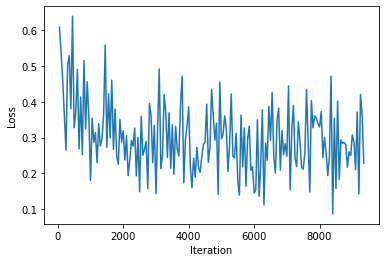

In [95]:
plt.plot(lstiterations, lstlosses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()            

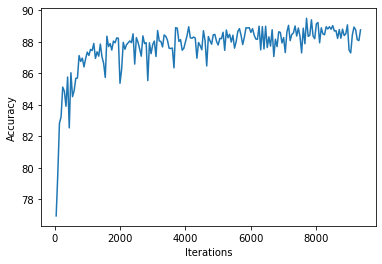

In [96]:
plt.plot(lstiterations, lstaccuracy)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()

In [90]:
class_correct = [0. for _ in range(10)]
total_correct = [0. for _ in range(10)]

with torch.no_grad():
    for images, labels in test_loader:
        test = Variable(images)
        outputs = model(test)
        predicted = torch.max(outputs, 1)[1]
        c = (predicted == labels).squeeze()
        
        for i in range(100):
            label = labels[i]
            class_correct[label] += c[i].item()
            total_correct[label] += 1
        
for i in range(10):
    print("Accuracy of {}: {:.2f}%".format(output_label(i), class_correct[i] * 100 / total_correct[i]))

IndexError: index 64 is out of bounds for dimension 0 with size 64

## Filters 

In [ ]:
class FashionCNN1(nn.Module):
    
    def __init__(self):
        super(FashionCNN, self).__init__()
        
        self.convlayer = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4)
        )
        
        self.fully_connected_layer_1 = nn.Linear(in_features=32*7*7, out_features=64)
        self.drop = nn.Dropout2d(0.25)
        self.fully_connected_layer_2 = nn.Linear(in_features=64, out_features=64)
        self.fully_connected_layer_3 = nn.Linear(in_features=64, out_features=10)
        
    def forward(self, x):
        out = self.convlayer(x)
        out = out.view(out.size(0), -1)
        out = self.fully_connected_layer_1(out)
        out = self.drop(out)
        out = self.fully_connected_layer_2(out)
        out = self.fully_connected_layer_3(out)
        
        return out
    
model = FashionCNN()
print(model)

In [110]:
list(model.parameters())[0].shape

torch.Size([32, 1, 3, 3])

In [114]:
list(model.parameters())[7]

Parameter containing:
tensor([ 0.1129, -0.0399,  0.1086, -0.0217, -0.0296, -0.1172, -0.0673, -0.1077,
         0.0212,  0.0453], requires_grad=True)

In [119]:
filters = list(model.parameters())[0]
filters

Parameter containing:
tensor([[[[ 2.7956e-01, -2.4780e-01, -2.0801e-01],
          [ 2.3427e-01, -1.0169e-01, -2.2255e-01],
          [-8.3205e-02,  4.7983e-02,  2.8062e-01]]],


        [[[ 1.4788e-02, -3.9390e-02, -9.7228e-02],
          [-2.4128e-01, -2.5705e-01,  2.2378e-01],
          [ 1.3481e-01, -2.4824e-01, -2.8518e-01]]],


        [[[-1.5233e-01, -1.3017e-01, -1.5192e-01],
          [ 5.2227e-03, -1.9333e-01,  1.8049e-01],
          [ 1.1837e-01, -1.8924e-01, -2.4146e-02]]],


        [[[ 2.3428e-01,  1.0781e-01, -3.2115e-01],
          [ 2.3590e-02, -1.2523e-02,  1.2329e-01],
          [-1.1760e-01, -1.4670e-01, -2.8191e-01]]],


        [[[-3.7086e-02,  1.0417e-01, -2.7328e-01],
          [ 2.4683e-01, -9.7187e-02,  3.8223e-02],
          [ 3.1547e-01,  2.5327e-01, -1.5901e-01]]],


        [[[ 1.9324e-01,  1.7925e-01, -2.0532e-01],
          [-1.3274e-01,  2.1862e-01,  2.9647e-01],
          [-2.4920e-01, -1.9220e-01,  1.4604e-01]]],


        [[[-1.9561e-01, -6.9583e-02,

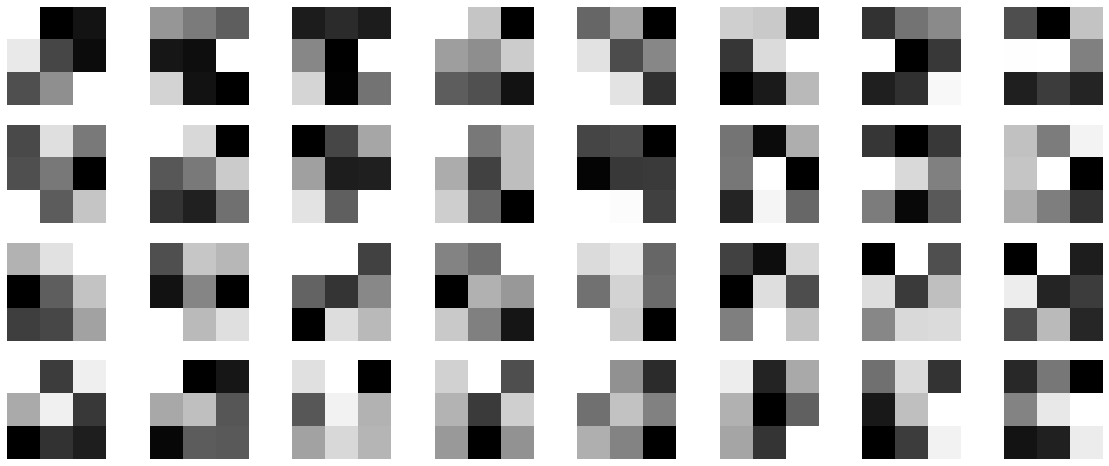

In [128]:
plt.figure(figsize=(20, 17))
for i, filter in enumerate(filters):
    plt.subplot(8, 8, i+1) 
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
from itertools import chain 

predictions_l = [predictions_list[i].tolist() for i in range(len(predictions_list))]
labels_l = [labels_list[i].tolist() for i in range(len(labels_list))]
predictions_l = list(chain.from_iterable(predictions_l))
labels_l = list(chain.from_iterable(labels_l))

In [ ]:
class FashionMnistModelBase(nn.Module):
    def training_step(self, batch):
        images, targets = batch 
        out = self(images)                      
        loss = F.cross_entropy(out, targets)      
        return loss
    
    def validation_step(self, batch):
        images, targets = batch 
        out = self(images)                           # Generate predictions
        loss = F.cross_entropy(out, targets)  # Calculate loss
        acc = accuracy(out, targets)
        return {'val_loss': loss.detach(), 'val_acc': acc }
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_acc = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_acc).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch,result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
class FashionMnistModel(FashionMnistModelBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(1, 28, kernel_size=3, padding=1), #output 28 X 28 X 28
            nn.ReLU(),
            nn.Conv2d(28, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 14 x 14

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 7 x 7

            nn.Flatten(), 
            nn.Linear(128 * 7 * 7, 512),
            nn.ReLU(),
            nn.Linear(512, 10))
        
    def forward(self, xb):
        return self.network(xb)

In [ ]:
epochs = 10
# opt_func = torch.optim.Adam
opt_func=torch.optim.SGD
lr = 0.001
# history = fit(num_epochs, lr, model, train_loader, val_loader, opt_func)


model = FashionMnistModel()

torch.cuda.empty_cache()
history = []
optimizer = opt_func(model.parameters(), lr)
for epoch in range(epochs):
    # Training Phase 
    model.train()
    train_losses = []
    for batch in train_loader:
        loss = model.training_step(batch)
        train_losses.append(loss)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    # Validation phase
    result = evaluate(model, val_loader)
    result['train_loss'] = torch.stack(train_losses).mean().item()
    model.epoch_end(epoch, result)
    history.append(result)
return history